# Time Series 시계열
- 동일한 변수의 시간에 따른 변동을 나타낸 데이터
- ex. 고객 수, 가격, 온도

### AutoCorrelation 자기 상관
    - 시점 간의 상관
> ex. 주식같이 오르락 내리락하는 것은 자기상관이 -
>
> : 오르면 내리고, 내리면 오른다
>
> ex. 자기상관이 + 인 경우
>
> 한 번 오르면 계속 올라가고, 한 번 내리면 계속 내려간다

### Trend 추세
### Seasonality 계절성

    - 주기적인 변동
    - 긴 기간에 걸친 자기상관이라고도 볼 수 있다
### Stationary ↔ Non-Stationary

    - 정체되어 있다
    - Time Series 구조가 일정한 상태
    - Non-Stationary 는 Time Series 분석하기 어렵다
### Outlier
    - 일반적인 데이터 분석에서는 Outlier 를 빼고 분석하면 된다
    - Time Series 에서는 시간 순서이기 때문에 뺄 수 없다.

### 실습) 사례 만들기
다이어리 판매량

- AutoCorrelation: +
- Trend: 감소
- Seasonality: 11, 12, 1 월에 연간 판매량 60%, 3월 9월 소폭 상승, 나머지 0 에 수렴
- Stationary: 
    - 공장에 불이나는 등 Outlier 가 있으면 Non-Stationary
    - 내려가는/올라가는 트렌드가 있으면 엄밀한 의미에서 Non-Stationary
- Outlier(원인)
    - 공장에 불이 났거나해서 1-2 개월 매출 감소 등
    - cf. 미디어의 노출, 스타벅스 다이어리: 트렌드가 바뀐 것
    
배고픔의 정도
- 전형적인 Stationary 데이터
- 하루단위 계절성(아침/점심/저녁)
- 주단위 계절성(주중/주말)

In [1]:
import pandas as pd

In [3]:
airline = pd.read_csv('airline.csv', parse_dates=['Month'])

airline.sample()

,Month,Passengers
96,1957-01-01,315


In [5]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
import seaborn as sns

C:\Users\Minju\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


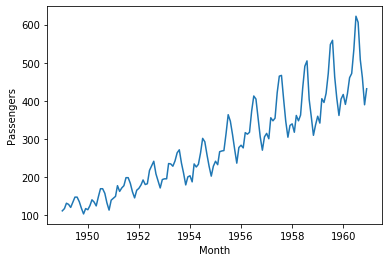

In [7]:
sns.lineplot('Month', 'Passengers', data=airline)

올라가는 Trend 가 있어 Non-Stationary 이고,
진폭도 점점 커지기 때문에 어려운 Non-Stationary 이다

In [13]:
# rolling 이동 평균 (구간을 옮겨가며 평균 낸다)

airline['Passengers'].rolling(window = 12).mean() # 12 달치 평균

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11     126.666667
12     126.916667
13     127.583333
14     128.333333
15     128.833333
16     129.166667
17     130.333333
18     132.166667
19     134.000000
20     135.833333
21     137.000000
22     137.833333
23     139.666667
24     142.166667
25     144.166667
26     147.250000
27     149.583333
28     153.500000
29     155.916667
          ...    
114    376.333333
115    379.500000
116    379.500000
117    380.500000
118    380.916667
119    381.000000
120    382.666667
121    384.666667
122    388.333333
123    392.333333
124    397.083333
125    400.166667
126    404.916667
127    409.416667
128    414.333333
129    418.333333
130    422.666667
131    428.333333
132    433.083333
133    437.166667
134    438.250000
135    443.666667
136    448.000000
137    453.250000
138    459

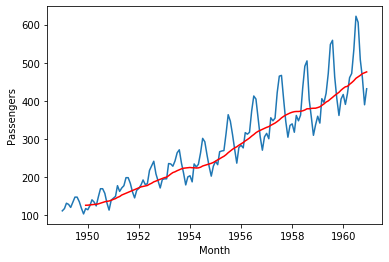

In [16]:
sns.lineplot('Month', 'Passengers', data=airline)
sns.lineplot(
airline['Month']
, airline['Passengers'].rolling(window=12).mean()
, color='red')

## ACF AutoCorrelation Function 자기상관 그래프
통계를 아는 사람만 그리는 있어보이는 그래프

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

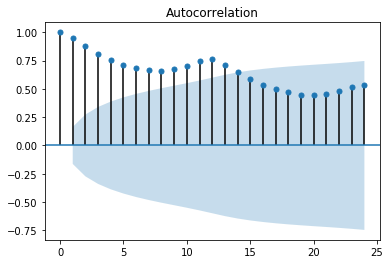

In [19]:
fig = plot_acf(airline['Passengers'], lags=24) 
# lags 기간 지정
# 0 개월의 상관은 무조건 1 자기자신이기 때문에

#### ACF 그래프 해석
- 바탕의 푸른색 배경 밖으로 벗어나야 상관이 있다고 볼 수 있다. 
>$p < 0.05$
- 위 그래프에서는 위로만 벗어나는 부분이 있으므로 Positive Correlation

#### ACF 로 보는 Stationary
- 패턴이 강하면 ACF 가 급격하게 떨어진다
- ACF 가 급격하게 뚝 떨어지면 Stationary
- ACF 가 서서히 떨어지면 Non-Stationary
- 위 데이터에서는 추세가 있기 때문에 빨리 떨어지지 않는다(추세가 있으면 엄밀한 의미에서 Non-Stationary)

## PACF Partial ACF

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

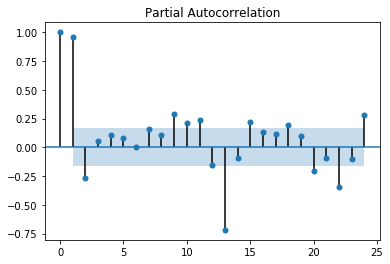

In [34]:
fig = plot_pacf(airline['Passengers'], lags=24)

### Stationary 정상성 검정 Augmented Dickey-Fuller Test 
$p < 0.05$ 여야 정상

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(airline['Passengers'])

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409


## Differencing 차분
- Time Series 데이터를 직전/직후 시점간의 차이로 바꾸는 것
- 선형적인 추세가 있으면 Time Series 가 Non-Stationary
- Differencing 으로 선형적 추세를 제거

In [22]:
import numpy as np

In [25]:
x = airline['Passengers'].values
x = np.log(x) # 로그 변환 1, 10, 100, 1000 -> 1, 2, 3, 4

diff = x[1:] - x[:-1] # Differencing

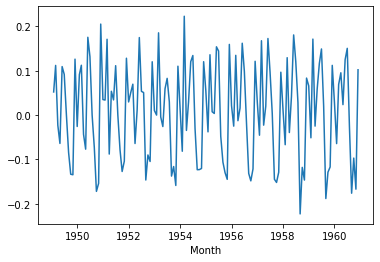

In [26]:
sns.lineplot(airline.iloc[1:, 0], diff)

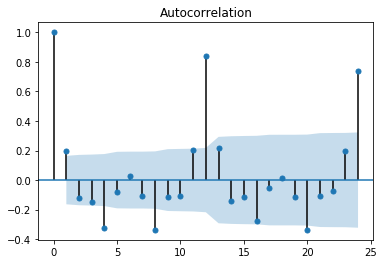

In [29]:
fig = plot_acf(diff, lags=24)

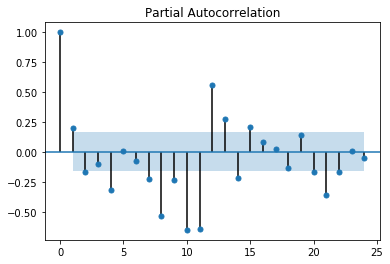

In [32]:
fig = plot_pacf(diff, lags=24)

## SARIMAX 
$S + AR + I + MA + X$
- 고전적인 Time Series 분석의 끝판왕
- 여러 기법을 합친 것
- $S$: Seasonality
- $I$: Differencing
- $X$: eXogenous 외생변수

### MA
데이터가 평균 주변에 묶여있다고 가정한다

> $y_t = μ+ ε_t -θ₁ε_{t-1}$

- $y_t$ 시점 $t$ 의 값
- $μ$ 평균
- $ε$ 오차
- $θ₁$ $t-1$ 의 가중치

#### MA(q)
$q$ 평균에서 벗어났을 때 그 영향이 얼마나 가느냐

### AR
$y_{y+1} = Φy_t + a_{t+1}$

- $Φ$ 시점 $t$ 의 가중치

MA | AR
-|-
이전 시점의 오차가 영향|이전 시점의 값이 영향

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
x_train = airline.iloc[:-24, 1]
x_test = airline.iloc[-24:, 1]

In [55]:
res = SARIMAX(
x_train
, order=(1, 1, 1)                    # (p, d, q)
, seasonal_order=(1, 1, 1, 1)).fit() # (P, D, Q, m)

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                        Passengers   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 1)   Log Likelihood                -550.921
Date:                           Wed, 09 Oct 2019   AIC                           1111.843
Time:                                   16:15:49   BIC                           1125.696
Sample:                                        0   HQIC                          1117.468
                                           - 120                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5086      0.042     12.090      0.000       0.426       0.591
ma.L1         -0.9997      2.157     -0.463      0.643      -5.228       3.228
ar.S.L1        0.5086      0.042     12.090      0.000       0.426       0.591
ma.S.L1       -0.9997      2.157     -0.463      0.643      -5.228       3.228
sigma2       599.5691   2579.214      0.232      0.816   -4455.598    5654.736
===================================================================================
Ljung-Box (Q):                      255.86   Jarque-Bera (JB):                 1.61
Prob(Q):                              0.00   Prob(JB):                         0.45
Heteroskedasticity (H):               7.35   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.42e+23. Standard errors may be unstable.
"""

In [56]:
n = len(x_train)
m = len(x_test)

forecast = res.predict(n + 1, n + m)

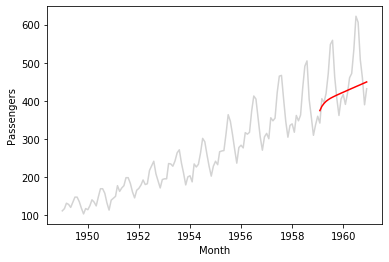

In [57]:
sns.lineplot('Month', 'Passengers', data=airline, color='lightgrey')
sns.lineplot(
airline.iloc[-24:, 0]
, forecast
, color='red')

#### 오차 확인

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(x_test, forecast)

5607.504087020228

### Facebook Prophet 

In [49]:
!conda install -y pystan

Solving environment: ...working... done

# All requested packages already installed.



In [50]:
!pip install fbprophet plotly

### Prophet 예측

In [51]:
from fbprophet import Prophet

prophet 에서는 컬럼 이름 고정

날짜는 ds, 숫자는 y 라고 해야 한다

In [58]:
df = airline.iloc[:-24, :].copy()

In [59]:
df.columns = ['ds', 'y']

In [60]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
future = pd.DataFrame({'ds': airline['Month'].values})

future.sample()

,ds
125,1959-06-01


In [63]:
pp = m.predict(future)

pp.sample()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
47,1952-12-01,208.636306,154.567581,202.920937,208.636306,208.636306,-29.976877,-29.976877,-29.976877,-29.976877,-29.976877,-29.976877,0.0,0.0,0.0,178.659428


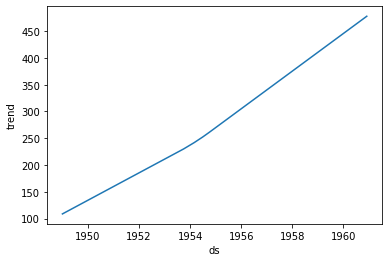

In [64]:
# 추세만 따로 확인할 수 있다
# 1955 년쯤 미세하게 추세가 꺾인다

sns.lineplot('ds', 'trend', data=pp)

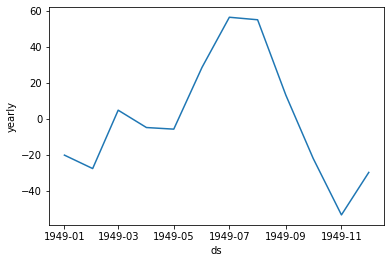

In [66]:
sns.lineplot('ds', 'yearly', data=pp.iloc[:12])

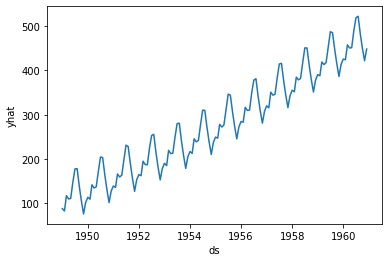

In [67]:
# 진폭이 커지는 건 못 잡아냄

sns.lineplot('ds', 'yhat', data=pp)

In [68]:
forecast = pp['yhat'].values[-24:]

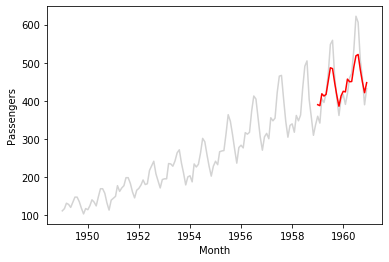

In [69]:
sns.lineplot('Month', 'Passengers', data=airline, color='lightgrey')
sns.lineplot(
airline.iloc[-24:, 0]
, forecast
, color='red')

#### 오차 확인

In [70]:
mean_squared_error(x_test, forecast)

1630.6312541454256

#### $R^2$ R-Squared
예측이 얼마나 정확한지/구한 오차가 얼마나 큰지 확인하기

$(1 - MSE)  /  Variance$

In [74]:
1 - mean_squared_error(x_test, forecast) / np.var(x_test)

0.707598596093931

In [71]:
#### y hat 등 hat 은 통계에서 예측값